# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Dataset yang digunakan dalam analisis ini adalah **Shop Customer Data** =  https://www.kaggle.com/datasets/datascientistanna/customers-dataset

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [34]:
# Memuat dataset dari file CSV
data = pd.read_csv('Customers.csv')

# Menampilkan 5 baris pertama dari dataset untuk memeriksa strukturnya
data.head()

CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
None
        CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  2000.000000  2000.000000        2000.000000             2000.000000   
mean   1000.500000    48.960000      110731.821500               50.962500   
std     577.494589    28.429747       45739.536688               27.934661   
min  

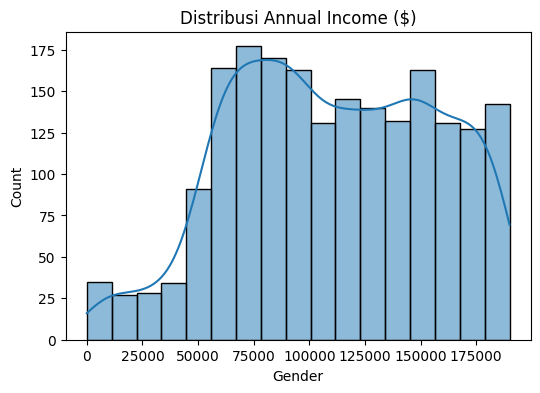

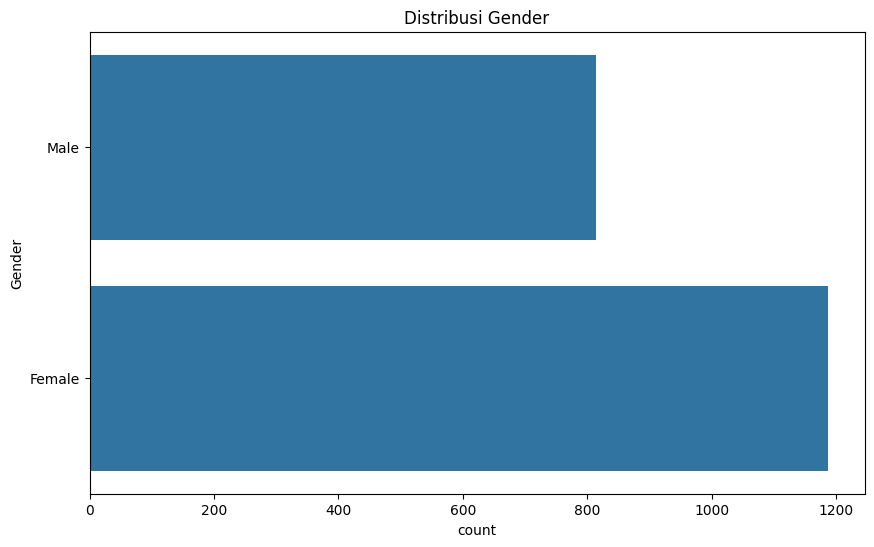

Missing values per column:
CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64


In [35]:
# 1. Memahami struktur data
print(data.info())
print(data.describe())

# 2. Visualisasi distribusi data numerikal
plt.figure(figsize=(6, 4))
sns.histplot(data["Annual Income ($)"], kde=True)
plt.title('Distribusi Annual Income ($)')
plt.xlabel('Gender')
plt.show()

# 3. Visualisasi data kategorikal (Provinsi)
plt.figure(figsize=(10, 6))
sns.countplot(y=data['Gender'])
plt.title('Distribusi Gender')
plt.show()

# 4. Cek missing values
print("Missing values per column:")
print(data.isnull().sum())

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [36]:
# Mengubah kolom numerikal menjadi angka dan menangani error
data['Annual Income ($)'] = pd.to_numeric(data['Annual Income ($)'], errors='coerce')

# Menghapus baris dengan nilai kosong
data = data.dropna()

# Pastikan semua nilai kosong telah dihapus
print("Jumlah nilai kosong per kolom setelah dropna:")
print(data.isnull().sum())

Jumlah nilai kosong per kolom setelah dropna:
CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64


In [37]:
# Menghapus duplikasi
data = data.drop_duplicates()
print("Jumlah data setelah menghapus duplikasi:", data.shape[0])

Jumlah data setelah menghapus duplikasi: 1965


In [38]:
from sklearn.preprocessing import StandardScaler

# Standarisasi kolom numerikal
scaler = StandardScaler()
data['data_content_scaled'] = scaler.fit_transform(data[['Annual Income ($)']])

In [39]:
# Saya menggunakan algoritma IQR untuk mendeteksi outlier pada kolom numerikal
Q1 = data['Annual Income ($)'].quantile(0.25)
Q3 = data['Annual Income ($)'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus outlier
data = data[(data['Annual Income ($)'] >= lower_bound) & (data['Annual Income ($)'] <= upper_bound)]
print("Jumlah data setelah menghapus outlier:", data.shape[0])

Jumlah data setelah menghapus outlier: 1965


In [40]:
# One-hot encoding untuk kolom kategorikal
data_encoded = pd.get_dummies(data, columns=['Gender'])

# Tampilkan hasil encoding
print("Kolom setelah encoding:", data_encoded.columns)

Kolom setelah encoding: Index(['CustomerID', 'Age', 'Annual Income ($)', 'Spending Score (1-100)',
       'Profession', 'Work Experience', 'Family Size', 'data_content_scaled',
       'Gender_Female', 'Gender_Male'],
      dtype='object')


In [41]:
# Membuat binning pada 'data_content_scaled' menjadi 3 kategori
data.loc[:, 'content_category'] = pd.cut(data['data_content_scaled'], bins=3, labels=['Low', 'Medium', 'High'])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [42]:
from sklearn.cluster import KMeans

# Pastikan hanya menggunakan kolom numerikal
numerical_columns = data_encoded.select_dtypes(include=['float64', 'int64']).columns
data_clustering = data_encoded[numerical_columns]

# Periksa apakah ada nilai NaN di data clustering
print("Jumlah nilai NaN di dalam data clustering:", data_clustering.isnull().sum().sum())

# Jalankan model K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data.loc[:, 'Cluster'] = kmeans.fit_predict(data_clustering)

# Tampilkan hasil cluster
print("Cluster labels telah ditambahkan ke dataset")
data.head()


Jumlah nilai NaN di dalam data clustering: 0
Cluster labels telah ditambahkan ke dataset


CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  data_content_scaled  \
0     Healthcare                1            4            -2.086675   
1       Engineer                3            3            -1.650205   
2       Engineer                1            1            -0.537207   
3         Lawyer                0            2            -1.126441   
4  Entertainment                2            6            -1.584734   

  content_category  Cluster  
0              Low        2  
1              Low        2  
2           Medium        1  
3              Low        2  
4              Low        2

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [43]:
from sklearn.metrics import silhouette_score

# Evaluasi Silhouette Score
silhouette_avg = silhouette_score(data_clustering, data['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.56


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [44]:
from sklearn.feature_selection import mutual_info_classif

# Mengidentifikasi fitur penting
features = numerical_columns
mutual_info = mutual_info_classif(data_clustering, data['Cluster'])
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': mutual_info
}).sort_values(by='Importance', ascending=False)

# Tampilkan fitur penting
print("Fitur yang paling berpengaruh terhadap clustering:")
print(feature_importance)

Fitur yang paling berpengaruh terhadap clustering:
                  Feature  Importance
2       Annual Income ($)    1.093169
6     data_content_scaled    1.093169
0              CustomerID    0.105265
3  Spending Score (1-100)    0.024433
1                     Age    0.024097
5             Family Size    0.024074
4         Work Experience    0.012030


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

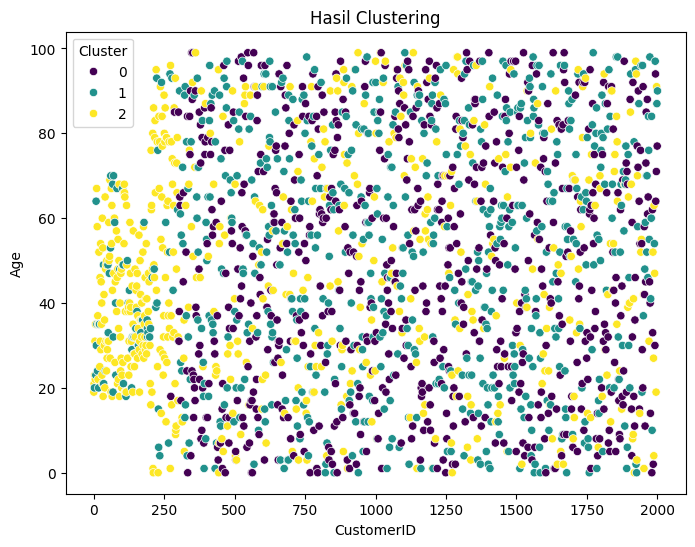

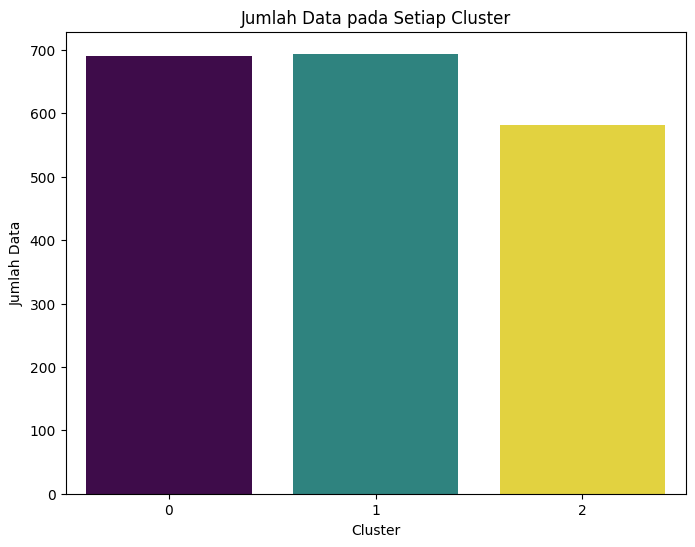

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi scatter plot (gunakan dua kolom numerikal utama)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data_clustering[numerical_columns[0]],
    y=data_clustering[numerical_columns[1]],
    hue=data['Cluster'],
    palette='viridis'
)
plt.title('Hasil Clustering')
plt.xlabel(numerical_columns[0])
plt.ylabel(numerical_columns[1])
plt.legend(title='Cluster')
plt.show()

# Visualisasi distribusi jumlah data per cluster
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', hue='Cluster', data=data, palette='viridis', legend=False)
plt.title('Jumlah Data pada Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [46]:
# Hitung rata-rata dan nilai dominan untuk tiap cluster
for cluster in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"\n=> Cluster {cluster}")
    print(f"Rata-rata 'Annual Income ($)'\t\t: {cluster_data['Annual Income ($)'].mean():.2f}")
    print(f"Rata-rata 'Spending Score (1-100)'\t: {cluster_data['Spending Score (1-100)'].mean():.2f}")
    print(f"Nilai Dominan 'Gender'\t\t\t: {cluster_data['Gender'].mode()[0]}")


=> Cluster 0
Rata-rata 'Annual Income ($)'		: 161527.06
Rata-rata 'Spending Score (1-100)'	: 52.35
Nilai Dominan 'Gender'			: Female

=> Cluster 1
Rata-rata 'Annual Income ($)'		: 105731.06
Rata-rata 'Spending Score (1-100)'	: 51.23
Nilai Dominan 'Gender'			: Female

=> Cluster 2
Rata-rata 'Annual Income ($)'		: 55988.70
Rata-rata 'Spending Score (1-100)'	: 49.38
Nilai Dominan 'Gender'			: Female


Tulis hasil interpretasinya di sini.

**1. Cluster 1:**

- **Rata-rata 'Annual Income ($)' :** 161527.06
- **Rata-rata 'Spending Score (1-100)' :** 52.35
- **Nilai Dominan 'Gender' :** Female

- **Analisis :** Cluster ini kemungkinan besar merepresentasikan pelanggan dengan pendapatan sangat tinggi dan pengeluaran moderat. Rata-rata 'Annual Income ($)' yang tinggi (161527.06) menunjukkan bahwa pelanggan dalam cluster ini memiliki penghasilan yang jauh di atas rata-rata. Namun, rata-rata 'Spending Score (1-100)' mereka (52.35) tergolong moderat, menunjukkan bahwa meskipun berpenghasilan tinggi, mereka tidak termasuk dalam kategori big spender. Gender yang dominan dalam cluster ini adalah Female. Mereka mungkin lebih selektif dalam pembelian dan memprioritaskan kualitas daripada kuantitas.

**2. Cluster 2:**
- **Rata-rata 'Annual Income ($)' :** 105731.06
- **Rata-rata 'Spending Score (1-100)' :** 51.23
- **Nilai Dominan 'Gender' :** Female

- **Analisis :** Cluster ini kemungkinan besar merepresentasikan pelanggan dengan pendapatan tinggi dan pengeluaran moderat. Rata-rata 'Annual Income ($)' yang tinggi (105731.06) menunjukkan bahwa pelanggan dalam cluster ini memiliki penghasilan di atas rata-rata. Rata-rata 'Spending Score (1-100)' mereka (51.23) juga tergolong moderat, mirip dengan Cluster 0. Gender yang dominan dalam cluster ini adalah Female. Mereka mungkin merupakan target pasar yang baik untuk produk dan layanan dengan harga premium, tetapi tetap mempertimbangkan nilai dan manfaat.

**3. Cluster 3:**
- **Rata-rata 'Annual Income ($)' :** 55988.70
- **Rata-rata 'Spending Score (1-100)' :** 49.38
- **Nilai Dominan 'Gender' :** Female

- **Analisis :** Cluster ini kemungkinan besar merepresentasikan pelanggan dengan pendapatan rendah dan pengeluaran moderat. Rata-rata 'Annual Income ($)' yang rendah (55988.70) dibandingkan dengan dua cluster lainnya menunjukkan bahwa pelanggan dalam cluster ini memiliki penghasilan di bawah rata-rata. Rata-rata 'Spending Score (1-100)' mereka (49.38) masih tergolong moderat, menunjukkan bahwa meskipun berpenghasilan rendah, mereka tetap melakukan pengeluaran untuk berbelanja. Gender yang dominan dalam cluster ini adalah Female. Mereka mungkin lebih sensitif terhadap harga dan mencari penawaran serta diskon yang menarik.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [47]:
# Menyimpan dataset dengan hasil clustering ke file csv
from google.colab import files
data.to_csv('Clustering_Customers_result.csv', index=False)
print("Hasil clustering telah disimpan ke 'Clustering_Customers_result.csv'")

files.download('Clustering_Customers_result.csv')

Hasil clustering telah disimpan ke 'Clustering_Customers_result.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>